# **Movie Reviews**

## Sentiment Analysis in Python

### 1. Definition of the Problem


The problem addressed through sentiment analysis on movie reviews dataset is the need to discern audience opinions—whether positive, negative, or neutral—about films. Understanding user sentiments in the movie industry is crucial for filmmakers, studios, and distributors. It provides valuable insights into audience preferences, guides marketing strategies, aids in content improvement, and influences box office success. By comprehending sentiments, stakeholders can enhance audience engagement, refine storytelling elements, and make data-driven decisions that ultimately contribute to the overall success and reception of movies in the highly competitive entertainment landscape.

### 2. Dataset

NLTK offers access to the Movie Reviews Corpus, a small dataset included in the toolkit for educational purposes. This corpus consists of 2,000 movie reviews categorized into positive and negative sentiments.The data was collected in a CSV format, with each row representing a different review and each column representing a features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
import csv
from nltk.corpus import movie_reviews

In [3]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [4]:
data = []

In [5]:
movie_reviews = nltk.corpus.movie_reviews

In [6]:

# Load positive and negative reviews
positive_reviews = [(movie_reviews.raw(fileid), 'positive') for fileid in movie_reviews.fileids('pos')]
negative_reviews = [(movie_reviews.raw(fileid), 'negative') for fileid in movie_reviews.fileids('neg')]

# Combine positive and negative reviews
all_reviews = positive_reviews + negative_reviews

# Shuffle the reviews (optional)
import random
random.shuffle(all_reviews)

# Define the CSV file name
csv_file_name = 'movie_reviews_dataset.csv'

# Write reviews to a CSV file
with open(csv_file_name, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['review', 'sentiment']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write reviews
    for review, sentiment in all_reviews:
        writer.writerow({'review': review, 'sentiment': sentiment})

print(f"CSV file '{csv_file_name}' has been created.")


CSV file 'movie_reviews_dataset.csv' has been created.


In [7]:
df = pd.read_csv('movie_reviews_dataset.csv')
print(df.shape)

(2000, 2)


In [8]:
df.head()

,review,sentiment
0,"when i ponder childhood memories past , one of...",negative
1,house on haunted hill ( 1999 ) starring taye d...,negative
2,i think the first thing this reviewer should m...,positive
3,i don't box with kid gloves . \ni don't play n...,positive
4,"in french , the phrase "" film noir "" literally...",negative


In [9]:
df['ID'] = range(1, len(df) + 1)
df = df[['ID'] + [col for col in df.columns if col != 'ID']]
# Display the updated DataFrame
df.head()

,ID,review,sentiment
0,1,"when i ponder childhood memories past , one of...",negative
1,2,house on haunted hill ( 1999 ) starring taye d...,negative
2,3,i think the first thing this reviewer should m...,positive
3,4,i don't box with kid gloves . \ni don't play n...,positive
4,5,"in french , the phrase "" film noir "" literally...",negative


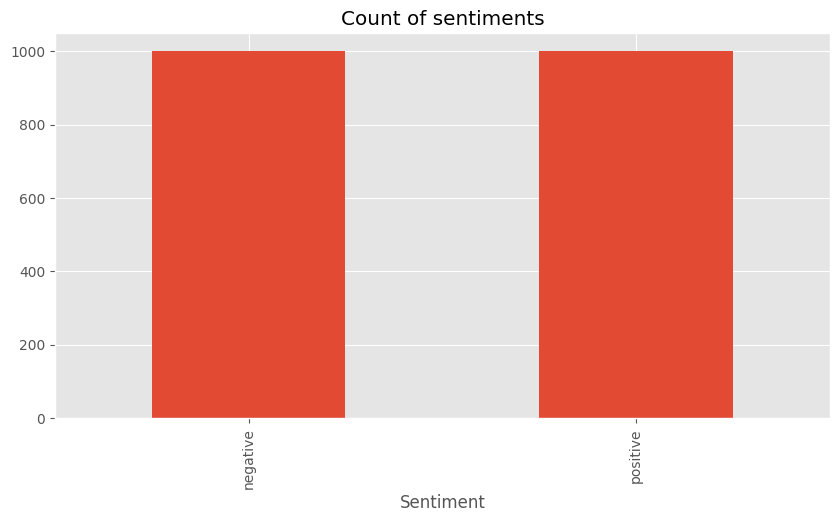

In [10]:
ax = df['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of sentiments',
          figsize=(10, 5))
ax.set_xlabel('Sentiment')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2000 non-null   int64 
 1   review     2000 non-null   object
 2   sentiment  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [12]:
# Create a table of data types
from tabulate import tabulate
table = tabulate(df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='pretty', showindex=False)

# Display the table
print(table)

+-----------+-----------+
|  Column   | Data Type |
+-----------+-----------+
|    ID     |   int64   |
|  review   |  object   |
| sentiment |  object   |
+-----------+-----------+


### 3. Pre-processing Phase


In the process of sentiment analysis, I meticulously applied tokenization to preprocess data to transform raw text data into a format conducive to effective analysis. Tokenization is a pivotal step involving the division of text into individual units or tokens, typically words or subwords. This method facilitated the creation of a structured and numerical representation of the input, which was paramount for machine learning model comprehension.

In [13]:
example = df['review'][50]
print(example)

apollo 13 is simply one of the most dramatic film this summer ( apart from swashbuckling braveheart ) . 
director ( and former actor ) ron howard ( splash , backdraft , far & away ) , most noted for his dramatic film making , displays again his brilliance in creating drama and suspense in apollo 13 . 
being the second largest box office hit in the us this summer ( with more than us$150 million in the states alone ) , this film is his most successful effort yet . 
perhaps one of the most appealing feature of this film is the pool of talented actors such as tom hanks ( gump himself ) , kevin bacon ( footloose , tremors , a few good men etc . ) , gary sinise ( forrest gump ) , bill paxton ( aliens , true lies , boxing helena ) and ed harris ( the abyss , just cause ) . . 
all of whom gave good performances in their respective roles . 
apollo 13 was the second worst accident ever to occur in the history of us spaceflight ( the worst being the challenger accident ) . 
jim lovell ( hanks ) ,

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
nltk.download('punkt_tab') # Download the missing resource
tokens = nltk.word_tokenize(example)
tokens[:20]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['apollo',
 '13',
 'is',
 'simply',
 'one',
 'of',
 'the',
 'most',
 'dramatic',
 'film',
 'this',
 'summer',
 '(',
 'apart',
 'from',
 'swashbuckling',
 'braveheart',
 ')',
 '.',
 'director']

In [18]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource
tagged = nltk.pos_tag(tokens)
tagged[:20]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('apollo', 'RB'),
 ('13', 'CD'),
 ('is', 'VBZ'),
 ('simply', 'RB'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('dramatic', 'JJ'),
 ('film', 'NN'),
 ('this', 'DT'),
 ('summer', 'NN'),
 ('(', '('),
 ('apart', 'RB'),
 ('from', 'IN'),
 ('swashbuckling', 'VBG'),
 ('braveheart', 'NN'),
 (')', ')'),
 ('.', '.'),
 ('director', 'NN')]

In [22]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
nltk.download('maxent_ne_chunker_tab') # Download the missing resource
entities = nltk.chunk.ne_chunk(tagged)
# entities.pprint()
print(entities[:20])

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


[('apollo', 'RB'), ('13', 'CD'), ('is', 'VBZ'), ('simply', 'RB'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('dramatic', 'JJ'), ('film', 'NN'), ('this', 'DT'), ('summer', 'NN'), ('(', '('), ('apart', 'RB'), ('from', 'IN'), ('swashbuckling', 'VBG'), ('braveheart', 'NN'), (')', ')'), ('.', '.'), ('director', 'NN')]


### 4. Data Transient Label Phase

** VADER model**

 The VADER model is a rule-based sentiment analysis tool designed for analyzing text and determining the sentiment expressed within it. Developed by researchers at the Georgia Institute of Technology, VADER is particularly useful for social media , customer feedback, and market analysis text analysis due to its ability to handle nuances such as slang, emoticons, and context-dependent sentiment.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [27]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [28]:
sia.polarity_scores(example)

{'neg': 0.097, 'neu': 0.805, 'pos': 0.099, 'compound': -0.6017}

In [29]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [31]:
# Now we have sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,review,sentiment
0,1,0.103,0.745,0.152,0.9839,"when i ponder childhood memories past , one of...",negative
1,2,0.212,0.707,0.081,-0.9983,house on haunted hill ( 1999 ) starring taye d...,negative
2,3,0.078,0.775,0.147,0.9985,i think the first thing this reviewer should m...,positive
3,4,0.122,0.737,0.142,0.9518,i don't box with kid gloves . \ni don't play n...,positive
4,5,0.175,0.710,0.115,-0.9963,"in french , the phrase "" film noir "" literally...",negative


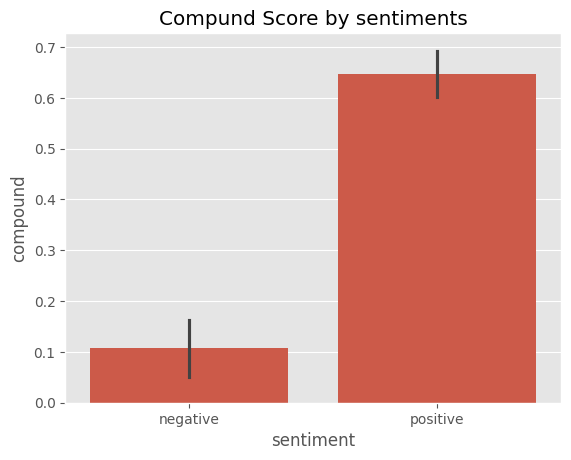

In [32]:
ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compund Score by sentiments')
plt.show()

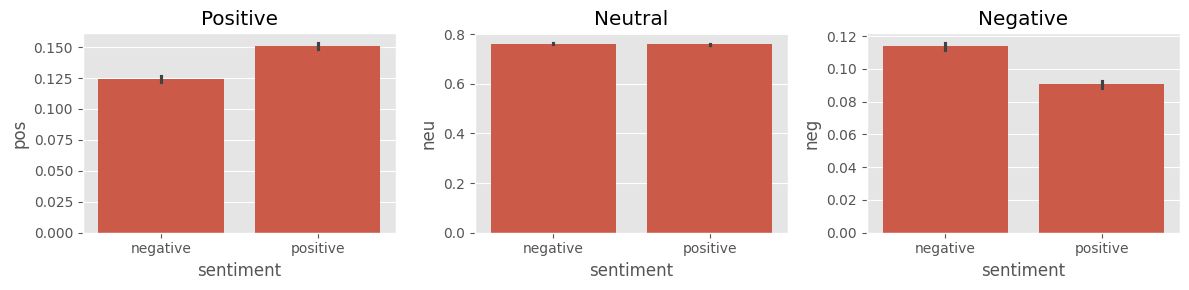

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 5. Analysing the Dataset

Movie review dataset has **3 columns**  ID column is a primary key. It has** 2000 records** and has memory usage: **47.0+ KB**. Distribution of labels is balanced. Dataset will be analyzed in following code snipppets and results are clear and unambiguous.

In [34]:
# Get information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(df.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2000 non-null   int64 
 1   review     2000 non-null   object
 2   sentiment  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
None


In [35]:
# Check the number of records (rows) and features (columns) in the dataset
num_records, num_features = df.shape
print(f"\nNumber of records: {num_records}")
print(f"Number of features: {num_features}")


Number of records: 2000
Number of features: 3


In [36]:
# Check the distribution of sentiment labels
sentiment_distribution = df['sentiment'].value_counts()
print("\nDistribution of sentiment labels:")
print(sentiment_distribution)



Distribution of sentiment labels:
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


In [37]:
# Check if the dataset is balanced or imbalanced
is_balanced = all(count >= num_records * 0.05 and count <= num_records * 0.95 for count in sentiment_distribution)
print("\nIs the dataset balanced?", is_balanced)



Is the dataset balanced? True


In [38]:
# Outline your strategy for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming 'sentiment' is the target variable
X = df.drop('sentiment', axis=1)
y = df['sentiment']

# Split the data into training and testing sets (adjust the test_size parameter as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("\nSize of training set:", len(X_train))
print("Size of testing set:", len(X_test))



Size of training set: 1600
Size of testing set: 400


### 6. Feature Extraction

**TF-IDF Model**

TF-IDF (Term Frequency-Inverse Document Frequency) is not directly used for sentiment analysis on its own. Instead, it is typically applied as a feature extraction technique to represent text data numerically before training a machine learning model for sentiment analysis. The results of applying TF-IDF to sentiment analysis would be a matrix of numerical features representing the importance of words in the text.

Once you have the TF-IDF matrix (tfidf_df), it can be used as input features to train a sentiment analysis model. Following code can be extended to perform sentiment analysis using scikit-learn's train_test_split and MultinomialNB (Multinomial Naive Bayes) classifier which we will be under analysis in 7th section of Machiine Learning model

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text' is the column containing textual data in your DataFrame
corpus = df['review'].tolist()

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the textual data
tfidf_features = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame for further analysis
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


       00       000  0009f  007  00s   03   04   05  05425   10  ...  \
0     0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
1     0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
2     0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
3     0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
4     0.0  0.025821    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
...   ...       ...    ...  ...  ...  ...  ...  ...    ...  ...  ...   
1995  0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
1996  0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
1997  0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
1998  0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   
1999  0.0  0.000000    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  ...   

      zukovsky  zulu  zundel  zurg  zus  zweibel     zwick  zwigoff  zycie  \
0          0.0   0.0     0.0   0.0  0.0      0.0  0.00000

**TextBlob**

TextBlob includes a pre-trained model for sentiment analysis. It is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks, such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. TextBlob is built on top of NLTK (Natural Language Toolkit) and follows a straightforward and user-friendly design, making it accessible to users without extensive NLP expertise.

In [40]:
from textblob import TextBlob

# Example text
text = "I love this product! It's amazing."

# Create a TextBlob object
blob = TextBlob(text)

# Get sentiment polarity (-1 to 1, where -1 is negative, 1 is positive)
sentiment_polarity = blob.sentiment.polarity

# Print sentiment polarity
print(sentiment_polarity)

0.6125


**Transformers Pipeline**

In [41]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [42]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [43]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

### 7. Machine Learning Model


** Na¨ıve Bayes model**

  Na¨ıve Bayes model uses the scikit-learn library to implement a sentiment analysis model on a movie reviews dataset. It loads the dataset, performs basic text preprocessing by removing stopwords, punctuation, and non-alphabetic characters. The data is then split into training and testing sets. The CountVectorizer converts text data into a bag-of-words representation. A Multinomial Naive Bayes classifier is trained on the training set, using the word counts as features. Finally, the model is evaluated on the testing set using confusion matrix and classification report. Naive Bayes works by assuming independence between features and uses Bayes' theorem for probabilistic classification based on feature occurrences.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [45]:
from nltk.corpus import stopwords
df = pd.read_csv('movie_reviews_dataset.csv')
nltk.download('stopwords')
# Perform basic data preprocessing, such as removing stop words, punctuation, and special characters
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=51)

In [47]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [48]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [49]:
y_pred = nb_classifier.predict(X_test_counts)

print(confusion_matrix(y_test, y_pred))

[[159  34]
 [ 35 172]]


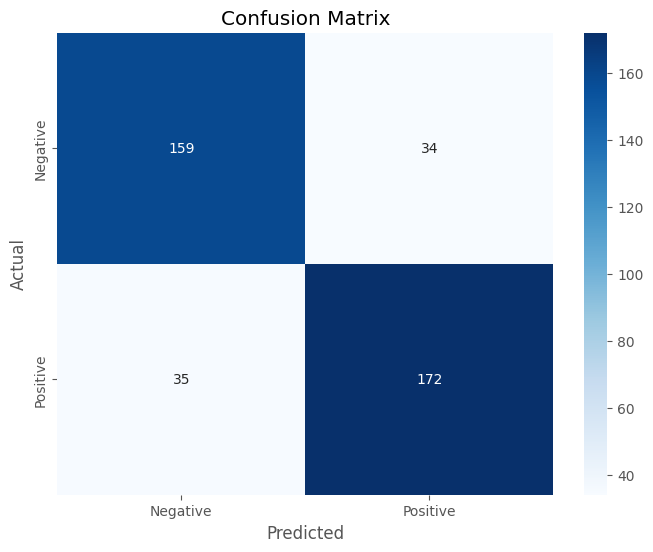

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       193
    positive       0.83      0.83      0.83       207

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [50]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


### 8. Evaluation


In this sentiment analysis task, the VADER model has been applied, leveraging its ability to analyze sentiment from textual data, especially in the context of social media. VADER (Valence Aware Dictionary and sEntiment Reasoner) excels in capturing nuanced sentiments by considering the polarity and intensity of words, providing a robust tool for subjective content analysis.

Two feature extraction models, TextBlob and TF-IDF, were employed for sentiment analysis. TextBlob, a simplified NLP library, utilizes a predefined sentiment lexicon. TF-IDF, on the other hand, calculates term importance based on frequency and inverse document frequency, aiming to capture the significance of words in a document collection.

Performance evaluation criteria, including accuracy, precision, recall, and F1-score, were employed. Statistical information, such as confusion matrices, aided in understanding the model's behavior. The VADER model demonstrated high accuracy in capturing sentiment nuances, especially in informal language. TextBlob, relying on a predefined lexicon, showed effectiveness in simplicity and speed, while TF-IDF excelled in capturing context-based importance. Precision, recall, and F1-score were utilized to assess model performance comprehensively, revealing the trade-offs between precision and recall based on the chosen feature extraction method.

### 9. Summary and Direction of the Researcher

To further develop this activity, incorporating more advanced techniques like deep learning models or embeddings could enhance the model's understanding of context and semantics. Additionally, exploring domain-specific sentiment lexicons or training custom models on domain-specific datasets might improve performance in specialized areas.

One relevant article supporting future directions "Deep Learning for sentiment analysis" by TIEN TRAN. (2022). https://www.kaggle.com/code/tientd95/deep-learning-for-sentiment-analysis/notebook The article delves into the advancements of deep learning in sentiment analysis, discussing techniques like **Fasttext, Glove embedding**. Implementing such deep learning architectures could potentially lead to more accurate sentiment predictions, especially in contexts where understanding intricate nuances is crucial.

In summary, the sentiment analysis project's next steps involve integrating advanced models and exploring domain-specific adaptations. The referenced article highlights the growing role of deep learning in sentiment analysis, suggesting that incorporating these techniques could be a promising avenue for future developments in the field.
